# Machine learning workflow demo

## Predicting house prices with California data

## Load libs

In [1]:
import warnings
warnings.simplefilter("ignore")
from local.lib import calhousing as ch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Loading BokehJS ...


## Inspect data in source format

In [2]:
!head local/data/cal_housing_small.data
!wc local/data/cal_housing_small.data

longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
-120.58,35.0,37.0,523.0,119.0,106300.0
-118.17,33.98,31.0,1236.0,329.0,155400.0
-122.22,37.81,52.0,1971.0,335.0,273700.0
-117.91,33.66,21.0,1708.0,505.0,193800.0
-121.92,37.24,27.0,1265.0,216.0,281200.0
-117.01,32.71,20.0,3506.0,692.0,129100.0
-116.39,34.15,15.0,5583.0,1149.0,73300.0
-120.67,35.5,15.0,2752.0,546.0,175000.0
-118.18,34.04,36.0,1807.0,630.0,129000.0
  501   501 20363 local/data/cal_housing_small.data


## Load data in Python's memory

In [3]:
d = pd.read_csv("local/data/cal_housing_small.data")
print (d.shape)
d.head()

(500, 6)


longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -120.58     35.00              37.0       523.0          119.0   
1    -118.17     33.98              31.0      1236.0          329.0   
2    -122.22     37.81              52.0      1971.0          335.0   
3    -117.91     33.66              21.0      1708.0          505.0   
4    -121.92     37.24              27.0      1265.0          216.0   

   medianHouseValue  
0          106300.0  
1          155400.0  
2          273700.0  
3          193800.0  
4          281200.0

## Show house locations on map

observa como el valor de las casas es más caro en zonas urbanas

In [4]:
ds = d.sample(500)
ch.plot_map(ds["latitude"].values, 
         ds["longitude"].values, ds["medianHouseValue"].values.reshape(-1,1)/1e5) 

## Separate variable to predict

In [5]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print (X.shape, y.shape)

(500, 5) (500,)


Split data from train and test

In [6]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
print (Xtr.shape, ytr.shape)
print (Xts.shape, yts.shape)

(350, 5) (350,)
(150, 5) (150,)


Create model with train data

In [7]:
dt = DecisionTreeRegressor()
dt = SVC()
dt.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Measure performance

In [8]:
print ("train score", ch.rel_rmse(dt, Xtr, ytr))
print ("test score ", ch.rel_rmse(dt, Xts, yts))

train score 0.0
test score  2.485187197103088


## Plot geographical distribution of errors

- limit errors to <1

In [9]:
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1] = 1
ch.plot_map(Xts[:,1], Xts[:,0], errs.reshape(-1,1))

## Make a parameter search

In [10]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
best

mean_fit_time              0.000840926
std_fit_time               9.93004e-06
mean_score_time            8.06808e-05
std_score_time             1.63521e-06
param_max_depth                      9
params                {'max_depth': 9}
split0_test_score             0.459292
split1_test_score             0.474798
split2_test_score             0.385812
split3_test_score              0.40111
split4_test_score             0.507209
split5_test_score             0.515449
split6_test_score              0.37672
split7_test_score             0.384045
split8_test_score             0.388542
split9_test_score             0.416314
mean_test_score               0.430929
std_test_score               0.0507572
rank_test_score                     19
split0_train_score           0.0847402
split1_train_score            0.166943
split2_train_score            0.105417
split3_train_score             0.12864
split4_train_score            0.191847
split5_train_score            0.114409
split6_train_score       

In [11]:
r

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000261      0.000062         0.000103        0.000065   
1        0.000304      0.000006         0.000074        0.000009   
2        0.000501      0.000124         0.000101        0.000033   
3        0.000598      0.000119         0.000111        0.000039   
4        0.000554      0.000010         0.000077        0.000005   
5        0.000677      0.000093         0.000094        0.000041   
6        0.000709      0.000011         0.000083        0.000015   
7        0.000779      0.000011         0.000079        0.000002   
8        0.000841      0.000010         0.000081        0.000002   
9        0.000893      0.000016         0.000082        0.000003   
10       0.000938      0.000017         0.000084        0.000003   
11       0.000968      0.000024         0.000084        0.000002   
12       0.001002      0.000031         0.000086        0.000004   
13       0.001018      0.000030         0.000085        0.000002   
14       0.001031      0.000038         0.000088        0.000008   
15       0.001035      0.000029         0.000086        0.000003   
16       0.001037      0.000035         0.000085        0.000002   
17       0.001073      0.000058         0.000090        0.000007   
18       0.001037      0.000039         0.000086        0.000003   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.682824           0.497395   
1                2   {'max_depth': 2}           0.624185           0.469594   
2                3   {'max_depth': 3}           0.506541           0.455372   
3                4   {'max_depth': 4}           0.440022           0.458800   
4                5   {'max_depth': 5}           0.411942           0.465462   
5                6   {'max_depth': 6}           0.420699           0.466070   
6                7   {'max_depth': 7}           0.411069           0.456188   
7                8   {'max_depth': 8}           0.415015           0.448289   
8                9   {'max_depth': 9}           0.459292           0.474798   
9               10  {'max_depth': 10}           0.476764           0.483809   
10              11  {'max_depth': 11}           0.463685           0.475442   
11              12  {'max_depth': 12}           0.480320           0.468652   
12              13  {'max_depth': 13}           0.468900           0.470668   
13              14  {'max_depth': 14}           0.480509           0.482737   
14              15  {'max_depth': 15}           0.475468           0.477460   
15              16  {'max_depth': 16}           0.440043           0.476279   
16              17  {'max_depth': 17}           0.474269           0.472275   
17              18  {'max_depth': 18}           0.466099           0.484094   
18              19  {'max_depth': 19}           0.476496           0.488054   

    split2_test_score  split3_test_score  ...  split2_train_score  \
0            0.566530           0.628341  ...            0.605847   
1            0.515386           0.578889  ...            0.547818   
2            0.460848           0.582567  ...            0.433806   
3            0.430570           0.554249  ...            0.377115   
4            0.410319           0.447721  ...            0.312966   
5            0.404359           0.421265  ...            0.243408   
6            0.403089           0.430816  ...            0.206624   
7            0.419750           0.388006  ...            0.155053   
8            0.385812           0.401110  ...            0.105417   
9            0.424301           0.455475  ...            0.068060   
10           0.376923           0.479149  ...            0.045951   
11           0.391683           0.501799  ...            0.028748   
12           0.361668           0.507783  ...            0.015008   
13           0.402406           0.466342  ...            0.006988   
14           0.402659      

## Use learning curves to assess performance


In [12]:
from local.lib import mlutils

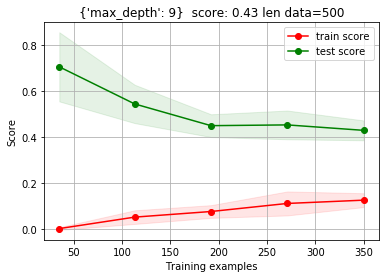

In [13]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## We obtained models with LOTS of variance!!! $\rightarrow$ increase data to 1k

In [14]:
d = pd.read_csv("local/data/cal_housing.data").sample(1000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print(X.shape, y.shape)
d.head()

(1000, 5) (1000,)


longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
16211    -121.31     37.96              52.0      1938.0          332.0   
1197     -121.65     39.32              40.0       812.0          154.0   
16902    -122.35     37.58              52.0      2495.0          458.0   
11832    -120.33     39.30              16.0       868.0          178.0   
11314    -117.96     33.77              32.0      4398.0          905.0   

       medianHouseValue  
16211          118400.0  
1197            73500.0  
16902          410800.0  
11832          175000.0  
11314          222800.0

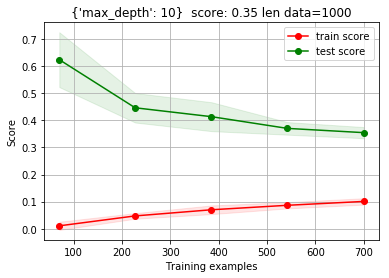

In [15]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 10k 

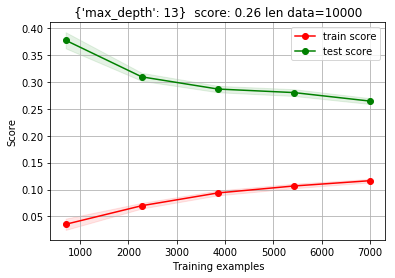

In [16]:

d = pd.read_csv("local/data/cal_housing.data").sample(10000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 20k (all available) 

- smaller increase
- very little variability
- still large variance!!!

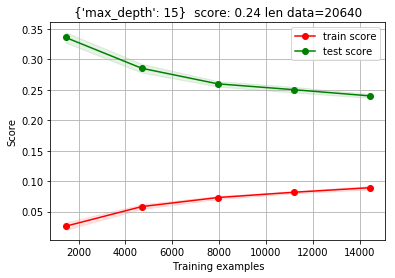

In [17]:
d = pd.read_csv("local/data/cal_housing.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## no more data available. let's try to add more information

- not much increase!!!


In [18]:
d = pd.read_csv("local/data/cal_housing_full.data")
d.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0

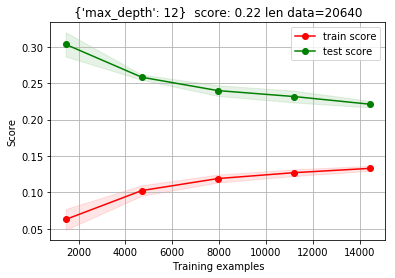

In [19]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)


## Let's observe geographical error distribution

In [20]:
d = pd.read_csv("local/data/cal_housing_full.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(Xtr,ytr)
print("train score", ch.rel_rmse(dt, Xtr, ytr))
print("test score ", ch.rel_rmse(dt, Xts, yts))
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1]=1
ch.plot_map(Xts[:3000,1], Xts[:3000,0], errs.reshape(-1,1))

train score 0.17433928928348438
test score  0.2264320004299234


## We now use this model to predict the price of a new house

In [21]:
newh = [[-118.22, 37.4, 10, 5000, 550, 8000, 200000, 3.5]]
dt.predict(newh)

array([154778.57142857])

## Understand our model's response to each variable

In [22]:
d = pd.read_csv("local/data/cal_housing_full.data").sample(20000)

nsamples = 1000
ncols = len(d.columns)-1
sample = np.random.random(size=(nsamples, ncols))
sample = (sample*20.).astype(int)/20.
dsample = pd.DataFrame(sample, columns=d.columns[:-1])
for i in d.columns[:-1]:
    dsample[i] = MinMaxScaler(feature_range=(np.min(d[i]), np.max(d[i]))).fit_transform(dsample[i].values.reshape(-1,1))

ch.plot_map(dsample["latitude"], dsample["longitude"], dt.predict(sample).reshape(-1,1)/1e5, size=5)

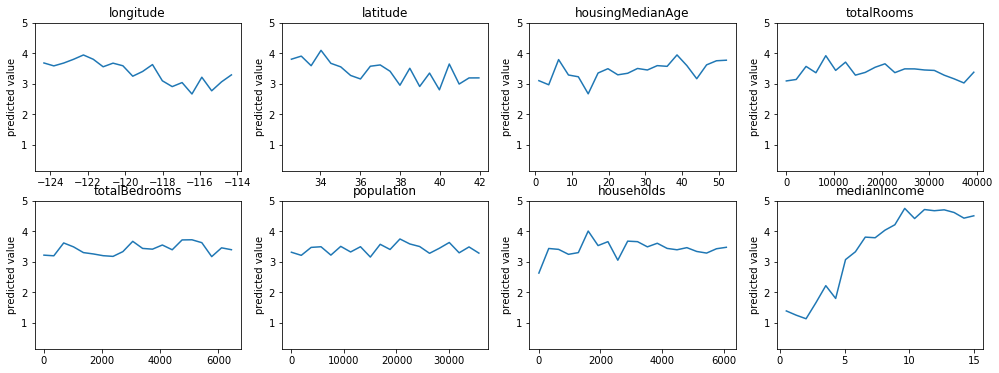

In [23]:
fig = plt.figure(figsize=(17,6))
c = 1
for col in dsample.columns:
    fig.add_subplot(2,4,c)
    c+=1
    x,y = [], []
    for i in np.unique(dsample[col]):
        x.append(i)

        dx = dsample[dsample[col]==i]
        y.append(np.mean(dt.predict(dx)/1e5))
    plt.plot(x,y)
    plt.ylabel("predicted value")
    plt.ylim(np.min(d["medianHouseValue"])/1e5, np.max(d["medianHouseValue"])/1e5)
    plt.title(col)
    

## Try using only visually meaningful columns

- another increase
- still variance

In [24]:
dfull = pd.read_csv("local/data/cal_housing_full.data")
d = dfull[["longitude", "latitude", "medianIncome", "medianHouseValue"]]
d.shape


(20640, 4)

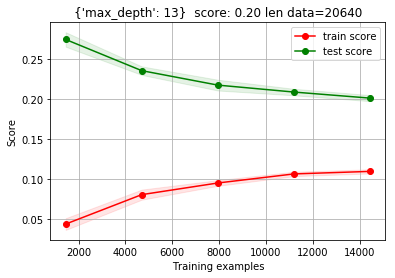

In [25]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = ch.gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
ch.plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

In [26]:
for i,col in enumerate(dfull.columns):
    if col!="medianHouseValue":
        print ("%20s %.3f"%(col, dt.feature_importances_[i]))

           longitude 0.156
            latitude 0.156
    housingMedianAge 0.057
          totalRooms 0.008
       totalBedrooms 0.012
          population 0.014
          households 0.013
        medianIncome 0.583
